# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [5]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

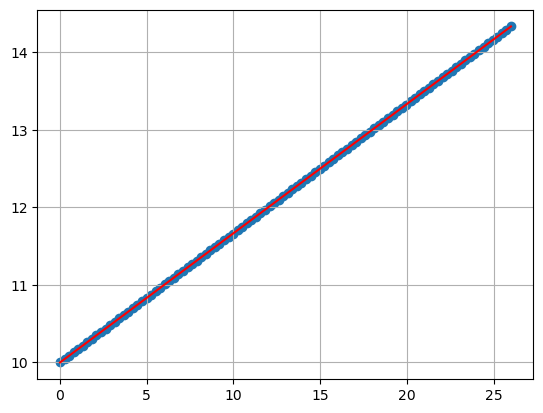

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2014 es 0

x = np.linspace(0, 26, 100)
y = 10 + 1/6*x
plt.figure()
plt.scatter(x, y)
plt.plot(x, 10 + 1/6*x, "r")
plt.grid()

In [ ]:
import scipy.optimize as opt

In [29]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [0, 26])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [30]:

beta_inicial = data
beta_inicial = np.reshape(beta_inicial, [0, 26])

n = len(y)
y = np.reshape(y, [n, -1])

x = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x))

ValueError: cannot reshape array of size 27 into shape (0,26)

In [31]:
sol = opt.minimize(funcion_de_costo,
                   beta_inicial,
                   args=(X, y))
sol

NameError: name 'opt' is not defined

ValueError: x and y must be the same size

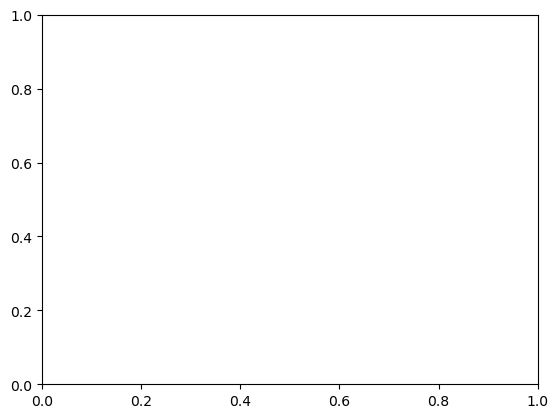

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 26, 100)
y = data
plt.figure()
plt.scatter(x, y,)
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [27]:
popu = pd.read_csv("population_data.csv")

In [28]:
print(popu)

    Year  Poblacion  Nacimientos  Decesos
0   1950      28296      1174947   418430
1   1951      29110      1183788   458238
2   1952      29980      1195209   408823
3   1953      30904      1261775   446127
4   1954      31880      1339837   378752
..   ...        ...          ...      ...
61  2011     115683      2586287   590693
62  2012     117054      2498880   602354
63  2013     118395      2478889   623599
64  2014     119713      2463420   633641
65  2015     121005      2353596   655694

[66 rows x 4 columns]
